In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


input_file = "pruned_objf_superstore.csv"
output_plot_objf = "REAL_OBJF_pruned_objf_superstore.png"
output_plot_alpha = "REAL_alpha_pruned_objf_superstore.png"


column_names = ['algo','k','util','div','objf','time']
df_all_objf = pd.read_csv(input_file, header=None, names = column_names)
df_all_alpha = pd.read_csv(input_file, header=None, names = column_names)

def calculate_alpha(util,div):
    total = (util+div)/2
    return total

df_alpha = df_all_alpha[df_all_alpha['k']==5]
df_alpha = df_alpha.drop(['k','objf','time'],axis=1)
df_alpha['0.1'] = calculate_alpha(df_alpha['util'], df_alpha['div'])
df_alpha['0.2'] = calculate_alpha(df_alpha['util'], df_alpha['div'])
df_alpha['0.3'] = calculate_alpha(df_alpha['util'], df_alpha['div'])
df_alpha['0.4'] = calculate_alpha(df_alpha['util'], df_alpha['div'])
df_alpha['0.5'] = calculate_alpha(df_alpha['util'], df_alpha['div'])
df_alpha['0.6'] = calculate_alpha(df_alpha['util'], df_alpha['div'])
df_alpha['0.7'] = calculate_alpha(df_alpha['util'], df_alpha['div'])
df_alpha['0.8'] = calculate_alpha(df_alpha['util'], df_alpha['div'])
df_alpha['0.9'] = calculate_alpha(df_alpha['util'], df_alpha['div'])
df_alpha = df_alpha.drop(['util','div'], axis=1)
df_alpha.set_index('algo',inplace=True)
df_alpha = df_alpha.transpose()
df = df_alpha
#df.to_csv("impact_alpha_to_objf_superstore.csv")

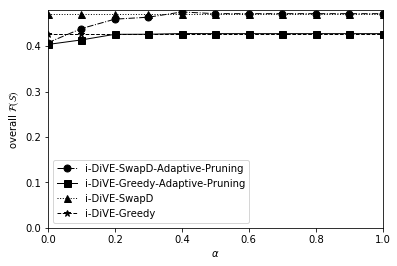

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


input_file = "impact_alpha_to_objf_superstore.csv"
output_plot_alpha = "new_impact_alpha_to_objf_superstore.svg"


df_all_alpha = pd.read_csv(input_file, header=0)
df = df_all_alpha
df = df.set_index('alpha')
#https://matplotlib.org/examples/color/named_colors.html
#my_color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
markers = ['o','s','^','*']
linestyles = ['-.','-',':','--']

#my_color = ['blue', 'black', 'maroon', 'red']
my_color = ['black', 'black', 'black', 'black', 'black', 'black']


#df = df.rename(columns={'SeeDB':'SBI','Greedy':'SBD','pGreedyPruning':'SBID-Greedy', 'SwapU':'SBID-SwapI', 'SwapD':'SBID-SwapD'})
df = df[['SBID-SwapD-Adaptive-Pruning','SBID-Greedy-Adaptive-Pruning','SBID-SwapD','SBID-Greedy']]
df = df.rename(columns={'SBID-SwapD-Adaptive-Pruning':'i-DiVE-SwapD-Adaptive-Pruning','SBID-Greedy-Adaptive-Pruning':'i-DiVE-Greedy-Adaptive-Pruning','SBID-SwapD':'i-DiVE-SwapD', 'SBID-Greedy':'i-DiVE-Greedy'})



ax = df.plot(kind='line', markersize=7, linewidth=1, color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
plt.xlabel(r'$\alpha$', fontsize=10)
plt.ylabel(r'overall $\mathcal{F(S)}$', fontsize=10)
#plt.xticks([0.2,0.4,0.6,0.8])
ax.set_ylim(ymin=0)

plt.savefig(output_plot_alpha,format="svg", dpi = 1000)
plt.show()

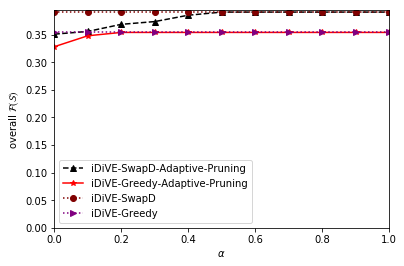

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


input_file = "impact_alpha_to_objf_flights.csv"
output_plot_alpha = "impact_alpha_to_objf_flights.png"


df_all_alpha = pd.read_csv(input_file, header=0)
df = df_all_alpha
df = df.set_index('alpha')
#https://matplotlib.org/examples/color/named_colors.html
#my_color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
my_color = ['black','red','maroon', 'purple', 'brown', 'green', 'sandybrown', 'dodgerblue']

markers = ['^','*', 'o', '>', '+', '*','+','^']
linestyles = ['--', '-', ':', ':','-.', '--',':','-']
#df = df.rename(columns={'SeeDB':'SBI','Greedy':'SBD','pGreedyPruning':'SBID-Greedy', 'SwapU':'SBID-SwapI', 'SwapD':'SBID-SwapD'})
df = df[['SBID-SwapD-Adaptive-Pruning','SBID-Greedy-Adaptive-Pruning','SBID-SwapD','SBID-Greedy']]
df = df.rename(columns={'SBID-SwapD-Adaptive-Pruning':'iDiVE-SwapD-Adaptive-Pruning','SBID-Greedy-Adaptive-Pruning':'iDiVE-Greedy-Adaptive-Pruning','SBID-SwapD':'iDiVE-SwapD', 'SBID-Greedy':'iDiVE-Greedy'})


ax = df.plot(kind='line', color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
plt.xlabel(r'$\alpha$', fontsize=10)
plt.ylabel(r'overall $\mathcal{F(S)}$', fontsize=10)
#plt.xticks([0.2,0.4,0.6,0.8])
ax.set_ylim(ymin=0)

plt.savefig(output_plot_alpha, dpi = 1000)
plt.show()

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(1.0 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

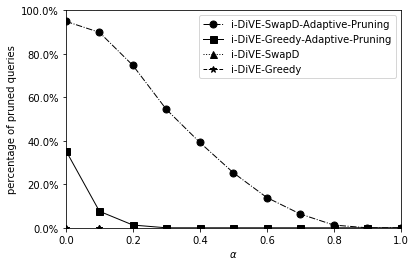

In [5]:
def percentage_flights(value):
    return (value/79)*100

input_file = "ewma_flights_pruning_adaptive.csv"
output_plot = "superstore_pruning_adaptive.svg"

column_names = ['alpha','SBID-Greedy','SBID-SwapD','SBID-Greedy-Static-Pruning','SBID-Greedy-Adaptive-Pruning','SBID-SwapD-Static-Pruning','SBID-SwapD-Adaptive-Pruning']
df = pd.read_csv(input_file, header=None, names = column_names)

df = df.set_index(['alpha'])
df = df.applymap(percentage_flights)

df = df[['SBID-SwapD-Adaptive-Pruning','SBID-Greedy-Adaptive-Pruning','SBID-SwapD','SBID-Greedy']]
df = df.rename(columns={'SBID-SwapD-Adaptive-Pruning':'i-DiVE-SwapD-Adaptive-Pruning','SBID-Greedy-Adaptive-Pruning':'i-DiVE-Greedy-Adaptive-Pruning','SBID-SwapD':'i-DiVE-SwapD', 'SBID-Greedy':'i-DiVE-Greedy'})

markers = ['o','s','^','*']
linestyles = ['-.','-',':','--']

#my_color = ['blue', 'black', 'maroon', 'red']
my_color = ['black', 'black', 'black', 'black', 'black', 'black']


ax = df.plot(kind='line', markersize=7, linewidth=1,color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
formatter = FuncFormatter(to_percent)


# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel(r'$\alpha$', fontsize=10)
plt.ylabel('percentage of pruned queries', fontsize=10)
plt.autolayout : True
ax.set_ylim(ymin=0)
ax.set_ylim(ymax=100)
plt.savefig(output_plot,format="svg", dpi = 1000, bbox_inches='tight')
plt.show()

In [14]:
def percentage_superstore(value):
    return (value/151)*100

input_file = "ewma_superstore_pruning_adaptive.csv"
output_plot = "adaptive_heart_pruning_alpha.svg"

column_names = ['alpha','SBID-Greedy','SBID-SwapD','SBID-Greedy-Static-Pruning','SBID-Greedy-Adaptive-Pruning','SBID-SwapD-Static-Pruning','SBID-SwapD-Adaptive-Pruning']
df = pd.read_csv(input_file, header=None, names = column_names)

df = df.set_index(['alpha'])
df = df.applymap(percentage_superstore)
df

,SBID-Greedy,SBID-SwapD,SBID-Greedy-Static-Pruning,SBID-Greedy-Adaptive-Pruning,SBID-SwapD-Static-Pruning,SBID-SwapD-Adaptive-Pruning
alpha,,,,,,
0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
0.1,0.0,0.0,0.0,0.000000,0.0,0.000000
0.2,0.0,0.0,0.0,0.000000,0.0,0.000000
0.3,0.0,0.0,0.0,0.000000,0.0,3.311258
0.4,0.0,0.0,0.0,0.000000,0.0,6.622517
0.5,0.0,0.0,0.0,0.000000,0.0,13.907285
0.6,0.0,0.0,0.0,0.000000,0.0,27.152318
0.7,0.0,0.0,0.0,0.000000,0.0,52.980132
0.8,0.0,0.0,0.0,3.311258,0.0,72.847682


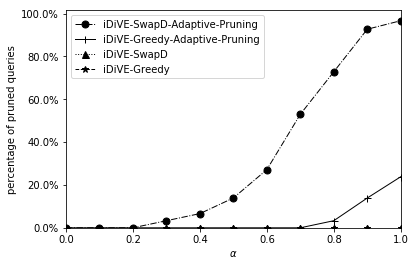

In [15]:
df = df[['SBID-SwapD-Adaptive-Pruning','SBID-Greedy-Adaptive-Pruning','SBID-SwapD','SBID-Greedy']]
df = df.rename(columns={'SBID-SwapD-Adaptive-Pruning':'iDiVE-SwapD-Adaptive-Pruning','SBID-Greedy-Adaptive-Pruning':'iDiVE-Greedy-Adaptive-Pruning','SBID-SwapD':'iDiVE-SwapD', 'SBID-Greedy':'iDiVE-Greedy'})

my_color = ['black', 'black', 'black', 'black', 'black', 'black']

markers = ['o','+','^','*']
linestyles = ['-.','-',':','--']


ax = df.plot(kind='line', markersize=7, linewidth=1,color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel(r'$\alpha$', fontsize=10)
plt.ylabel('percentage of pruned queries', fontsize=10)
plt.autolayout : True
ax.set_ylim(ymin=0)
plt.savefig(output_plot,format="svg", dpi = 1000, bbox_inches='tight')
plt.show()

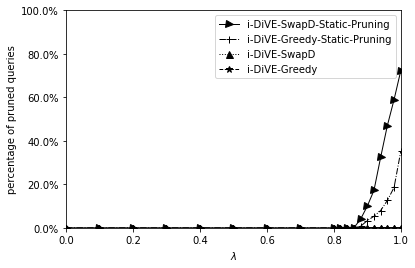

In [8]:
def percentage_superstore(value):
    return (value/151)*100

input_file = "static_superstore_pruning.csv"
output_plot = "static_superstore_pruning.svg"

column_names = ['tradeoff','i-DiVE-Greedy','i-DiVE-SwapD','i-DiVE-Greedy-Static-Pruning','i-DiVE-SwapD-Static-Pruning']
df = pd.read_csv(input_file, header=None, names = column_names)

df = df.set_index(['tradeoff'])
df = df.applymap(percentage_superstore)
df = df[['i-DiVE-SwapD-Static-Pruning','i-DiVE-Greedy-Static-Pruning','i-DiVE-SwapD','i-DiVE-Greedy']]

markers = ['>','+','^','*']
linestyles = ['-','-.',':','--']


#my_color = ['orange', 'magenta', 'maroon', 'red']

my_color = ['black', 'black', 'black', 'black', 'black', 'black']


ax = df.plot(kind='line', markersize=7, linewidth=1,color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel(r'$\lambda$', fontsize=10)
plt.ylabel('percentage of pruned queries', fontsize=10)
plt.autolayout : True
ax.set_ylim(ymax=100)
ax.set_ylim(ymin=0)
plt.savefig(output_plot, format="svg", dpi = 1000, bbox_inches='tight')
plt.show()

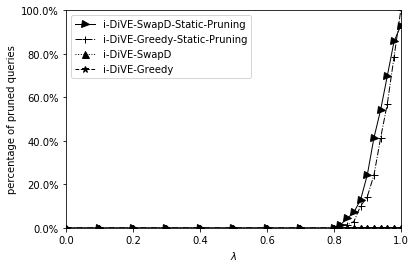

In [9]:
def percentage_heartd(value):
    return (value/70)*100

input_file = "static_heart_pruning.csv"
output_plot = "static_heart_pruning.svg"

column_names = ['tradeoff','i-DiVE-Greedy','i-DiVE-SwapD','i-DiVE-Greedy-Static-Pruning','i-DiVE-SwapD-Static-Pruning']
df = pd.read_csv(input_file, header=None, names = column_names)

df = df.set_index(['tradeoff'])
df = df.applymap(percentage_heartd)
df = df[['i-DiVE-SwapD-Static-Pruning','i-DiVE-Greedy-Static-Pruning','i-DiVE-SwapD','i-DiVE-Greedy']]

markers = ['>','+','^','*']
linestyles = ['-','-.',':','--']


#my_color = ['orange', 'magenta', 'maroon', 'red']

my_color = ['black', 'black', 'black', 'black', 'black', 'black']


ax = df.plot(kind='line', markersize=7, linewidth=1,color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel(r'$\lambda$', fontsize=10)
plt.ylabel('percentage of pruned queries', fontsize=10)
plt.autolayout : True
ax.set_ylim(ymax=100)
ax.set_ylim(ymin=0)
plt.savefig(output_plot, format="svg", dpi = 1000, bbox_inches='tight')
plt.show()

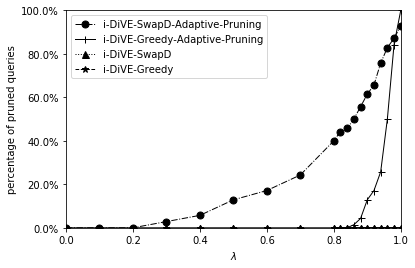

In [10]:
def percentage_heartd(value):
    return (value/70)*100

input_file = "adaptive_heart_pruning.csv"
output_plot = "adaptive_heart_pruning_lambda.svg"

column_names = ['tradeoff','i-DiVE-Greedy','i-DiVE-SwapD','i-DiVE-Greedy-Adaptive-Pruning','i-DiVE-SwapD-Adaptive-Pruning']
df = pd.read_csv(input_file, header=None, names = column_names)

df = df.set_index(['tradeoff'])
df = df.applymap(percentage_heartd)
df = df[['i-DiVE-SwapD-Adaptive-Pruning','i-DiVE-Greedy-Adaptive-Pruning','i-DiVE-SwapD','i-DiVE-Greedy']]

markers = ['o','+','^','*']
linestyles = ['-.','-',':','--']


#my_color = ['orange', 'magenta', 'maroon', 'red']

my_color = ['black', 'black', 'black', 'black', 'black', 'black']


ax = df.plot(kind='line', markersize=7, linewidth=1,color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel(r'$\lambda$', fontsize=10)
plt.ylabel('percentage of pruned queries', fontsize=10)
#plt.autolayout : True
ax.set_ylim(ymax=100)
ax.set_ylim(ymin=0)
plt.savefig(output_plot, format="svg", dpi = 1000, bbox_inches='tight')
plt.show()

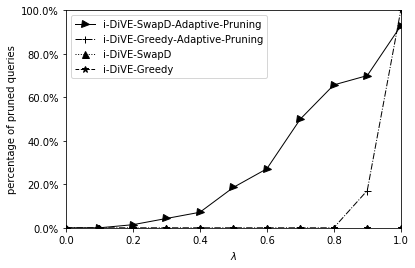

In [11]:
def percentage_heartd(value):
    return (value/70)*100

input_file = "adaptive_heart_pruning_lowQ.csv"
output_plot = "adaptive_heart_pruning_lowQ.svg"

column_names = ['tradeoff','i-DiVE-Greedy','i-DiVE-SwapD','i-DiVE-Greedy-Adaptive-Pruning','i-DiVE-SwapD-Adaptive-Pruning']
df = pd.read_csv(input_file, header=None, names = column_names)

df = df.set_index(['tradeoff'])
df = df.applymap(percentage_heartd)
df = df[['i-DiVE-SwapD-Adaptive-Pruning','i-DiVE-Greedy-Adaptive-Pruning','i-DiVE-SwapD','i-DiVE-Greedy']]

markers = ['>','+','^','*']
linestyles = ['-','-.',':','--']


#my_color = ['orange', 'magenta', 'maroon', 'red']

my_color = ['black', 'black', 'black', 'black', 'black', 'black']


ax = df.plot(kind='line', markersize=7, linewidth=1,color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel(r'$\lambda$', fontsize=10)
plt.ylabel('percentage of pruned queries', fontsize=10)
plt.autolayout : True
ax.set_ylim(ymax=100)
ax.set_ylim(ymin=0)
plt.savefig(output_plot, format="svg", dpi = 1000, bbox_inches='tight')
plt.show()

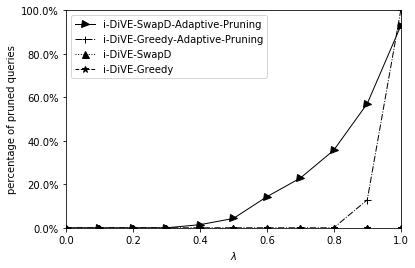

In [12]:
def percentage_heartd(value):
    return (value/70)*100

input_file = "adaptive_heart_pruning_highQ.csv"
output_plot = "adaptive_heart_pruning_highQ.svg"

column_names = ['tradeoff','i-DiVE-Greedy','i-DiVE-SwapD','i-DiVE-Greedy-Adaptive-Pruning','i-DiVE-SwapD-Adaptive-Pruning']
df = pd.read_csv(input_file, header=None, names = column_names)

df = df.set_index(['tradeoff'])
df = df.applymap(percentage_heartd)
df = df[['i-DiVE-SwapD-Adaptive-Pruning','i-DiVE-Greedy-Adaptive-Pruning','i-DiVE-SwapD','i-DiVE-Greedy']]

markers = ['>','+','^','*']
linestyles = ['-','-.',':','--']


#my_color = ['orange', 'magenta', 'maroon', 'red']

my_color = ['black', 'black', 'black', 'black', 'black', 'black']


ax = df.plot(kind='line', markersize=7, linewidth=1,color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel(r'$\lambda$', fontsize=10)
plt.ylabel('percentage of pruned queries', fontsize=10)
plt.autolayout : True
ax.set_ylim(ymax=100)
ax.set_ylim(ymin=0)
plt.savefig(output_plot, format="svg", dpi = 1000, bbox_inches='tight')
plt.show()

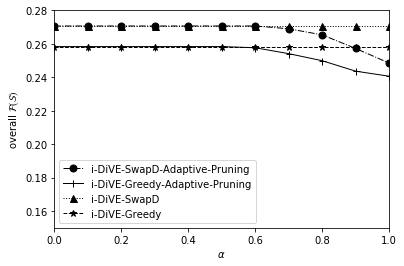

In [16]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


input_file = "impact_alpha_to_objf_heart_disease.csv"
output_plot_alpha = "impact_alpha_to_objf_heart_disease.svg"


df_all_alpha = pd.read_csv(input_file, header=0)
df = df_all_alpha
df = df.set_index('alpha')
#https://matplotlib.org/examples/color/named_colors.html
#my_color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
markers = ['o','+','^','*']
linestyles = ['-.','-',':','--']

#my_color = ['blue', 'black', 'maroon', 'red']
my_color = ['black', 'black', 'black', 'black', 'black', 'black']


#df = df.rename(columns={'SeeDB':'SBI','Greedy':'SBD','pGreedyPruning':'SBID-Greedy', 'SwapU':'SBID-SwapI', 'SwapD':'SBID-SwapD'})
df = df[['SBID-SwapD-Adaptive-Pruning','SBID-Greedy-Adaptive-Pruning','SBID-SwapD','SBID-Greedy']]
df = df.rename(columns={'SBID-SwapD-Adaptive-Pruning':'i-DiVE-SwapD-Adaptive-Pruning','SBID-Greedy-Adaptive-Pruning':'i-DiVE-Greedy-Adaptive-Pruning','SBID-SwapD':'i-DiVE-SwapD', 'SBID-Greedy':'i-DiVE-Greedy'})



ax = df.plot(kind='line', markersize=7, linewidth=1, color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
plt.xlabel(r'$\alpha$', fontsize=10)
plt.ylabel(r'overall $\mathcal{F(S)}$', fontsize=10)
#plt.xticks([0.2,0.4,0.6,0.8])
ax.set_ylim(ymin=0.15)
ax.set_ylim(ymax=0.28)

plt.savefig(output_plot_alpha,format="svg", dpi = 1000,bbox_inches='tight')
plt.show()